In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image

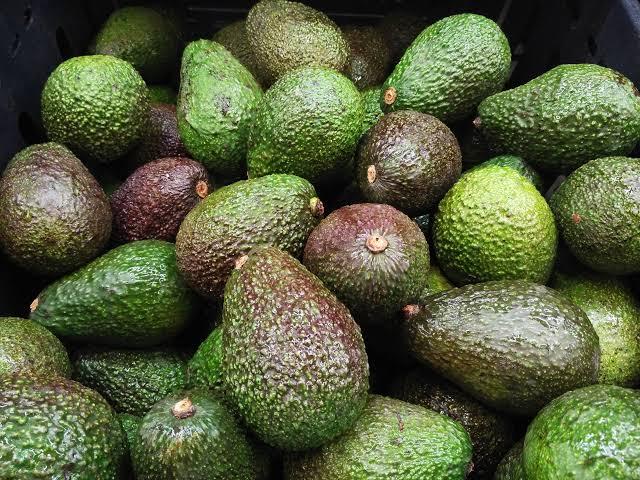

In [2]:
url = "D:\Avacado.jpeg"
Image(url,width=300)

In [3]:
df = pd.read_csv(r"D:\All Data-set\avocado.csv",index_col=0)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [5]:
# checking for missing value present or not
df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

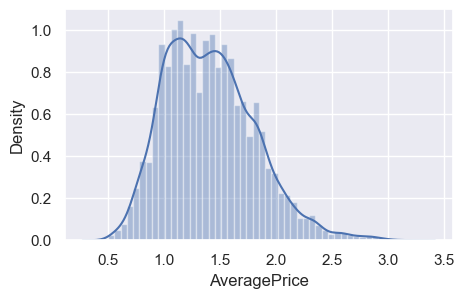

In [6]:
plt.figure(figsize=(5,3))
sns.distplot(df['AveragePrice'])
plt.show()

In [7]:
target_year = 2015
target_value = 'organic'
filtered_df = df[(df['year'] == target_year) & (df['type'] == target_value)]
count = len(filtered_df)
print(count)

2807


In [8]:
target_year = 2015
target_value = 'conventional'
filtered_df = df[(df['year'] == target_year) & (df['type'] == target_value)]
count = len(filtered_df)
print(count)

2808


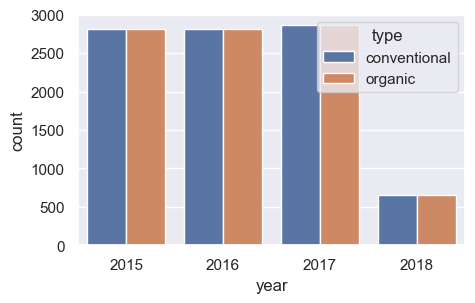

In [9]:
# check the how much selling of organic and conventional avacado per year
plt.figure(figsize=(5,3))
sns.countplot(x='year',data=df,hue='type');

In [10]:
df.year.value_counts()

year
2017    5722
2016    5616
2015    5615
2018    1296
Name: count, dtype: int64

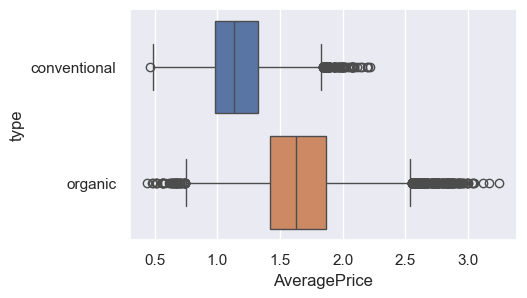

In [11]:
# check which avacado price is more expensive
plt.figure(figsize=(5,3))
sns.boxplot(y="type", x="AveragePrice", data=df,hue='type');
plt.show()

organic avacado's are more expensive than conventional avacado 

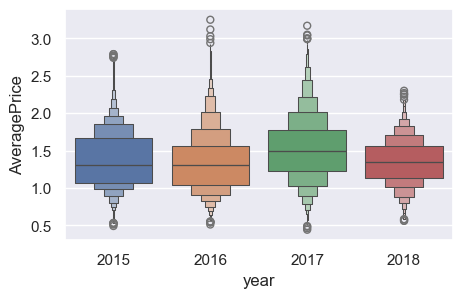

In [13]:
# check in which year tha avacado is more expensive
plt.figure(figsize=(5,3))
df.year=df.year.apply(str)
sns.boxenplot(x="year", y="AveragePrice", data=df,hue='year');

Avacados were slightly more expensive in the year 2017

In [15]:
# convert organic to 1 and conventional to 0
df['type']= df['type'].map({'conventional':0,'organic':1})

In [16]:
df.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany


In [17]:
df['Date'] = pd.to_datetime(df['Date'])                  # convert the object type to date type
df['month'] = df['Date'].dt.month                        # Extract the month from the Date column
df.drop('Date',inplace=True,axis=1)                      # Drop the date column
df.month = df.month.map({1:'JAN',2:'FEB',3:'MARCH',4:'APRIL',5:'MAY',6:'JUNE',7:'JULY',8:'AUG',9:'SEPT',10:'OCT',11:'NOV',12:'DEC'})

In [18]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany,DEC
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany,DEC
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany,DEC
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany,DEC
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany,NOV


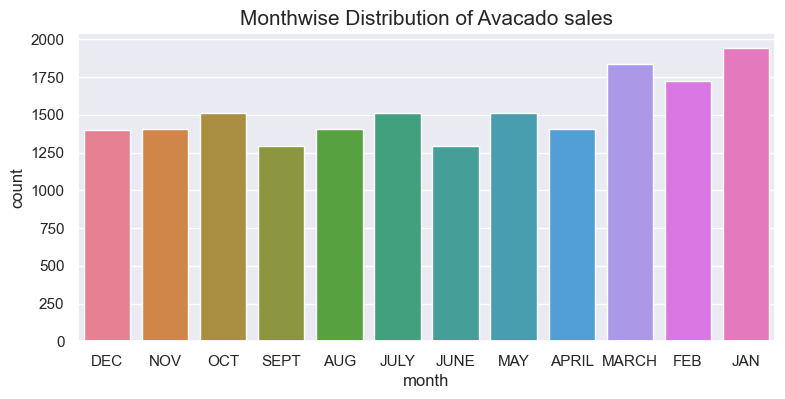

In [19]:
# check month wise distribution
plt.figure(figsize=(9,4))
sns.countplot(x = 'month', data =df,hue='month')
plt.title('Monthwise Distribution of Avacado sales',fontdict={'fontsize' : 15})
plt.show()

In the above graph we conclude that the sale of avacado is high in jan to march

In [21]:
dummies = pd.get_dummies(df[['year','region','month']],drop_first=True)      # drop_first is used for avoid multicollinearity (redundant information)
x = pd.concat([df[['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type']],dummies],axis=1)
y = df['AveragePrice']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

# Standardizing the data
cols_to_stdcols = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags', 'XLarge Bags']
sc = StandardScaler()

sc.fit_transform(x_train[cols_to_stdcols])
sc.transform(x_test[cols_to_stdcols])

array([[-0.2372533 , -0.23089169, -0.23532891, ..., -0.23959523,
        -0.15827723, -0.17742982],
       [-0.24593511, -0.23103223, -0.24618918, ..., -0.24376903,
        -0.21845633, -0.17742982],
       [-0.01887704,  0.0734613 , -0.1918529 , ..., -0.05519271,
         0.50752401, -0.15450396],
       ...,
       [ 0.52174241,  0.18598526,  0.78366074, ...,  0.60764914,
        -0.00224564, -0.12220429],
       [-0.21273423, -0.19505815, -0.21887126, ..., -0.19762201,
        -0.206989  , -0.17742982],
       [-0.18522544, -0.18876844, -0.22340449, ..., -0.09891203,
        -0.19218902,  0.65897297]])

In [22]:
regressors = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Regressor' : SVR(gamma=1),
    'K-nearest Neighbors' : KNeighborsRegressor(n_neighbors=1),
    'XGBoost' : XGBRegressor()
}

results=pd.DataFrame(columns=['MAE','MSE','R2-score'])

for method,func in regressors.items():
    model = func.fit(x_train,y_train)
    pred = model.predict(x_test)
    results.loc[method] = [np.round(mean_absolute_error(y_test,pred),3),                    # 3 is for upto three decimal point
                          np.round(mean_squared_error(y_test,pred),3),
                          np.round(r2_score(y_test,pred),3)]

In [23]:
results

,MAE,MSE,R2-score
Linear Regression,0.182,0.059,0.632
Decision Tree,0.131,0.041,0.745
Random Forest,0.096,0.019,0.882
Support Vector Regressor,0.322,0.160,-0.001
K-nearest Neighbors,0.178,0.077,0.520
XGBoost,0.094,0.017,0.896


In [24]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.20)

#importing tensorflow libraries

import tensorflow as tf
# for building and training neural networks

from tensorflow.keras.models import Sequential
# Sequential is a linear stack of layers.

from tensorflow.keras.layers import Dense, Activation,Dropout
# Imports the Dense layer (fully connected layer), Activation layer (to apply activation functions), and Dropout layer (for regularization).

from tensorflow.keras.optimizers import Adam
# Imports the Adam optimizer, a popular optimization algorithm for training neural networks

from tensorflow.keras.callbacks import EarlyStopping
# mports the EarlyStopping callback, which can be used to stop training if the validation loss stops improving.

#creating model
model = Sequential()

model.add(Dense(76,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))

model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))

model.add(Dropout(0.5))                         # this layers are added after the first three dense layers to prevent overfitting.

model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))

model.add(Dropout(0.5))

model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))

model.add(Dropout(0.5))

model.add(Dense(1))                                   # dds the final output layer with 1 neuron, suitable for regression tasks

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10)

In [25]:
model.fit(x=x_train.values.astype('float'), y=y_train.values.astype('float'),
          validation_data=(x_val.values.astype('float'), y_val.values.astype('float')),
          batch_size=100, epochs=150, callbacks=[early_stop])

Epoch 1/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1811262208.0000 - val_loss: 5840317.0000
Epoch 2/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 151781072.0000 - val_loss: 1417124.2500
Epoch 3/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33373806.0000 - val_loss: 533898.5000
Epoch 4/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22250610.0000 - val_loss: 94392.8516
Epoch 5/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8171319.0000 - val_loss: 91299.3281
Epoch 6/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2617457.0000 - val_loss: 73347.9922
Epoch 7/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1363995.8750 - val_loss: 17025.9922
Epoch 8/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 571195.8750 - val_loss: 8774.0322
Epoch 9/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 428378.8125 - val_loss: 6911.7173
Epoch 10/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 281778.7500 - val_loss: 4675.1323
Epoch 11/150
103/103 ━━

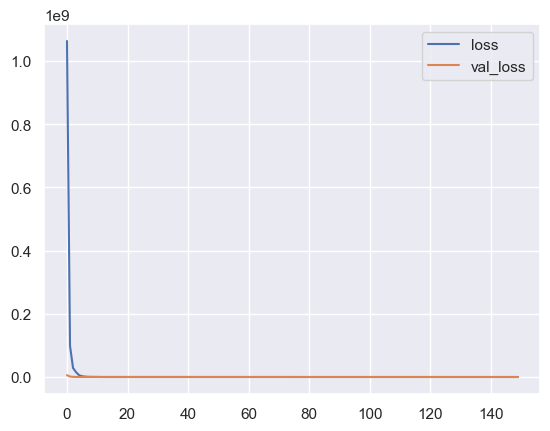

In [26]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot();

In [27]:
dnn_pred = model.predict(x_test)

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [33]:
results.loc['Deep Neural Network'] = [
    np.round(mean_absolute_error(y_test, dnn_pred),3),
    np.round(mean_squared_error(y_test, dnn_pred),3),
    np.round(r2_score(y_test, dnn_pred),3)
]
results

,MAE,MSE,R2-score
Linear Regression,0.182,0.059,0.632
Decision Tree,0.131,0.041,0.745
Random Forest,0.096,0.019,0.882
Support Vector Regressor,0.322,0.160,-0.001
K-nearest Neighbors,0.178,0.077,0.520
XGBoost,0.094,0.017,0.896
Deep Neural Network,0.324,0.164,-0.026


In [37]:
f"10% of mean of target variable is {np.round(0.1 * df.AveragePrice.mean(),3)}"

'10% of mean of target variable is 0.141'

In [39]:
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Greens',subset=['R2-score'])

,MAE,MSE,R2-score
XGBoost,0.094000,0.017000,0.896000
Random Forest,0.096000,0.019000,0.882000
Decision Tree,0.131000,0.041000,0.745000
Linear Regression,0.182000,0.059000,0.632000
K-nearest Neighbors,0.178000,0.077000,0.520000
Support Vector Regressor,0.322000,0.160000,-0.001000
Deep Neural Network,0.324000,0.164000,-0.026000
